# **Project Name**    - Flipcart Customer Service Satisfaction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member -**  Shubham Pandey

# **Project Summary -**

Customer satisfaction is a critical metric for the long-term success of service-driven platforms like Flipkart. This project aimed to develop a machine learning model that classifies customer service satisfaction (CSAT) using a combination of structured and unstructured data. The primary goal was to accurately identify dissatisfied customers so that proactive measures could be taken to enhance support quality and improve overall customer experience.

**Problem Statement**
The problem was framed as a binary classification task. The CSAT score, originally a continuous or categorical metric, was converted into a binary target variable CSAT_binary:

- Class 1: Satisfied

- Class 0: Dissatisfied

The dataset included a wide variety of features such as:

- Categorical variables (e.g., channel name, agent name, supervisor)

- Temporal features (e.g., date and time of issue raised/responded)

- Textual data (e.g., customer remarks)

- Engineered variables (e.g., response time in hours, frequency of agent assignments, issue reported on weekend)

**Data Preprocessing and Feature Engineering**
Several preprocessing steps were performed to clean and structure the data effectively:

- Missing values were handled appropriately for categorical and text-based features.

- Features with very low variance were removed to reduce dimensionality.

- Highly correlated features were dropped to prevent multicollinearity.

- Temporal features were transformed to extract useful information such as day of the week, weekend flag, and response time buckets.

- The textual field "Customer Remarks" was tokenized, POS-tagged, and transformed using TF-IDF vectorization to convert text into numerical representations.

- Additional features like “Tenure_Shift” and agent workload frequency were engineered to enhance model performance.

**Handling Class Imbalance**
Since the dataset was imbalanced with a higher number of satisfied customers, balancing techniques were applied:

- Random Forest was trained using class_weight='balanced'.

- XGBoost used scale_pos_weight to adjust class imbalance.

- CatBoost utilized auto_class_weights='Balanced'.

These adjustments helped ensure the model gave due importance to the minority class (dissatisfied customers).

**Model Development and Evaluation**
Three models were implemented:

- Random Forest Classifier

- XGBoost Classifier

- CatBoost Classifier

Each model was evaluated using metrics such as accuracy, precision, recall, and F1-score. Given the business context, special emphasis was placed on recall and F1-score for the dissatisfied class, as missing a dissatisfied customer could lead to missed opportunities for service recovery and retention.

After baseline evaluations, hyperparameter tuning was conducted using:

- RandomizedSearchCV for Random Forest and XGBoost

- Optuna (Bayesian Optimization) for CatBoost

The CatBoost model performed best after tuning:

- Accuracy: 85%

- Recall (for satisfied class): 99%

- F1-score (overall): 0.91

Although recall for the dissatisfied class remained lower, CatBoost still offered the most balanced and robust performance overall.

**Model Explainability and Deployment**
To ensure interpretability, SHAP (SHapley Additive exPlanations) was used to visualize feature importance. Key influencing factors included response time, agent name, channel of contact, and sub-category of issues.

The final CatBoost model was serialized using joblib and tested on unseen data samples, validating its predictive capabilities. The model is now ready for integration into a live support system or dashboard.

**Conclusion**
This project successfully developed a machine learning pipeline capable of predicting customer satisfaction with high accuracy and strong generalization. With proper deployment, the model can help Flipkart's customer service team prioritize dissatisfied users, leading to faster resolutions, improved service experience, and increased customer retention

# **GitHub Link -**

https://github.com/Shubhampandey1git/Flipcart-Customer-Service-Satisfaction


# **Problem Statement**


Flipkart, one of India's largest e-commerce platforms, receives a vast number of customer service requests daily across multiple support channels. While Customer Satisfaction (CSAT) scores are collected post-resolution, predicting customer satisfaction ahead of time remains a challenge.

The goal of this project is to analyze and classify customer satisfaction (CSAT) based on service request data using machine learning techniques. By identifying key factors—such as response time, issue category, agent attributes, and ticket metadata—we aim to:

Predict whether a customer is likely to be satisfied or unsatisfied with the service they received.

Uncover actionable insights into what drives satisfaction or dissatisfaction.

Improve overall customer service performance by informing business decisions with data.

This classification will help Flipkart proactively enhance customer experience, optimize agent performance, and prioritize support strategies.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [297]:
# Import Libraries
# For Loading and Operating on datasets
import pandas as pd

# For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# For Hypothesis Testing
from scipy.stats import ttest_ind, f_oneway, chi2_contingency # for t-tests, one-way anova, and chi-square test


# For Categorical Encoding
from sklearn.preprocessing import LabelEncoder 

# For Textual Preprocessing
import contractions # for expanding contractions
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from symspellpy.symspellpy import SymSpell, Verbosity # for rephrasing text
import pkg_resources
import os
import spacy # for lemmetization
from sklearn.feature_extraction.text import TfidfVectorizer  # for tf-idf vectorization

# For Feature Selection
from sklearn.feature_selection import VarianceThreshold, RFECV # for removing low-variance features and Recursive feature elimination with cross-validation
from sklearn.ensemble import RandomForestClassifier # For tree based feature importance.
from sklearn.feature_selection import SelectFromModel  # Recursive feature elimination with cross-validation

# For Data Splitting and handling Imbalanced Dataset
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool

# For Evaluation Metics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# For Hyperparameter Tuning and Cross-Validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
import optuna

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [298]:
# Load Dataset
df = pd.read_csv("Customer_support_data.csv")  # Loading dataset as a dataframe

### Dataset First View

In [299]:
# Dataset First Look
df.head()  # Printing the first 5 elements of the data set

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [300]:
# Dataset Rows & Columns count
print(df.shape)

(85907, 20)


### Dataset Information

In [301]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [302]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


#### Missing Values/Null Values

In [303]:
# Missing Values/Null Values Count
print(df.isnull().sum())

# Total missing values
print("Total missing values: ", df.isnull().sum().sum())

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64
Total missing values:  435995


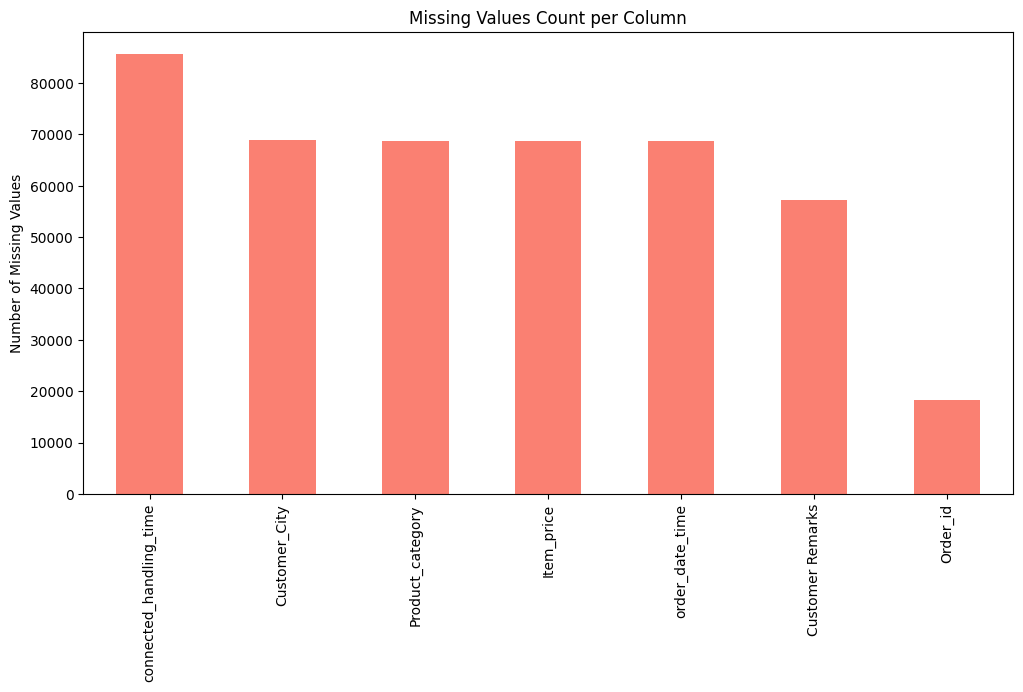

In [304]:
# Visualizing the missing values
missing = df.isnull().sum()
missing = missing[missing > 0]  # Filter only columns with missing values

missing.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='salmon')
plt.title("Missing Values Count per Column")
plt.ylabel("Number of Missing Values")
plt.show()

### What did you know about your dataset?

Answer Here:
1. There are in total 20 columns and 8590 rows in the dataset.
2. There are no duplicate rows/ values in the dataset.
3. There are in total 435995 missing values in the dataset with maximum being in 'connected_handling_time' column.
4. The bar plot gives a great summary for how many missing values does each column have.

## ***2. Understanding Your Variables***

In [305]:
# Dataset Columns
print(df.columns.tolist())

['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [306]:
# Dataset Describe
print(df.describe())

          Item_price  connected_handling_time    CSAT Score
count   17206.000000               242.000000  85907.000000
mean     5660.774846               462.400826      4.242157
std     12825.728411               246.295037      1.378903
min         0.000000                 0.000000      1.000000
25%       392.000000               293.000000      4.000000
50%       979.000000               427.000000      5.000000
75%      2699.750000               592.250000      5.000000
max    164999.000000              1986.000000      5.000000


### Variables Description

Answer Here:
1. There are a total of 20 variables/ columns.
2. There are 3 numeric type variables, namely 'Item_price', 'connected_handling_time' and 'CSAT Score'.
3. Describe function gives us the count, mean, standard_deviation, minimum value, maximum value, and 25%, 50% and 75% respectively.

### Check Unique Values for each variable.

In [307]:
# Check Unique Values for each variable.
print(df.nunique())

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [308]:
# Write your code to make your dataset analysis ready.

# Replacing invalid dates with Not a Time
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')

# Calculate Response Time in Hours
df['response_time_hr'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600

# Handling missing values in response_time_hr ( replacing with median)
df['response_time_hr'] = df['response_time_hr'].fillna(df['response_time_hr'].median())

# Converting CSAT Score to Binary (For simplification)
df['CSAT_binary'] = df['CSAT Score'].apply(lambda x: 1 if x >=4 else 0)


# Making a copy of dataset for Visualization
original_df = df.copy()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24968\3748175567.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24968\3748175567.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], errors='coerce')


### What all manipulations have you done and insights you found?

Answer Here.:
1. 'Issue_responded' and 'Issue_reported at' columns were used to calculate a **new variable** named *'reponse_time_hr'*.
2. The missing values in 'response_time_hr' are replaced from its **median**.
3. The CSAT Score is converted to have binary data with **(Satisfactory)1 -> 4 or 5** and **(Unsatisfactory)0 -> 1 to 3** for simplification.
4. Lastly we make a copy of df, which we will use for visualization.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

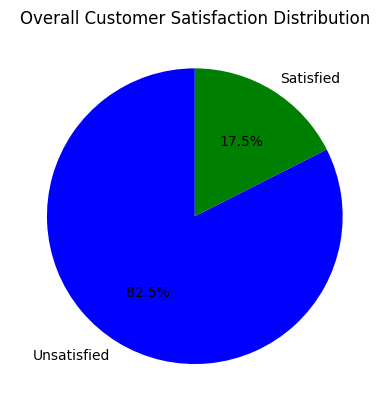

In [309]:
# Chart - 1 visualization code
# Pie Chart
original_df['CSAT_binary'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'green'], labels=['Unsatisfied', 'Satisfied'])
plt.title("Overall Customer Satisfaction Distribution")
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.:
-> The chart showcases the Class distribution in CSAT_binary, i.e, the people who are satisfied(having high CSAT_Scores) and those who are Unsatisfied(low CSAT_Scores).

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-> As we can observe from the above chart the majority of the customers are Unsatisfied, about 82.5%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
1. Yes, the insights gained form this chart is helpful in creating a positive business impact.
2. As, this focuses on how many customers are Satisfied and how many are not. This will help the business to check the effect of the already implemented solutions.
3. There is a major insight here which can effect the customer loyalty negatively, as we can see a trend of Unsatisfied customers.

#### Chart - 2

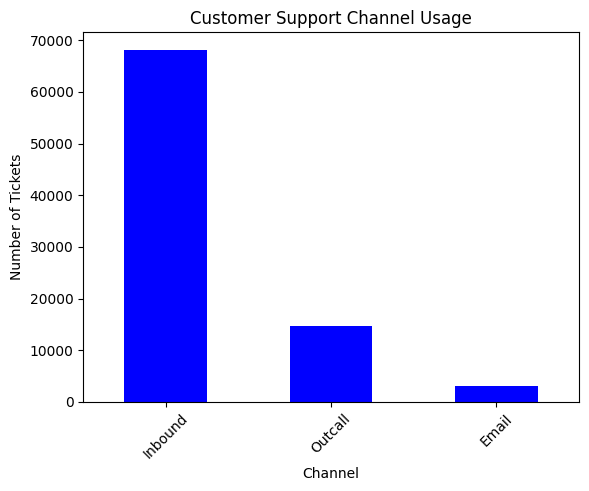

In [310]:
# Chart - 2 visualization code
# Bar Chart
original_df['channel_name'].value_counts().plot(kind='bar', color='blue')
plt.title("Customer Support Channel Usage")
plt.xlabel('Channel')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: -> This chart gives is a clear understanding about what channels are used the most, thus helping us in prioritizing those ares.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
1. As we can observe, the inbound channel has maximum number of tickets and far exceeds any other channels.
2. This implies that maximum number of customers prefer inbound channel of communication, thus the business can focus on these channels for implementing better Customer Satisfaction strategies and resource allocation.
3. Also, the tickets are not distributed among the channels equally.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
1. Yes, the insights gained form this chart is helpful in creating a positive business impact.
2. Yes, there is one insight that may lead to negative or slow business growth; the tickets are not distributed among the channels equally, leading to higher load on inbound and outbound centers which can hamper the productivity.

#### Chart - 3

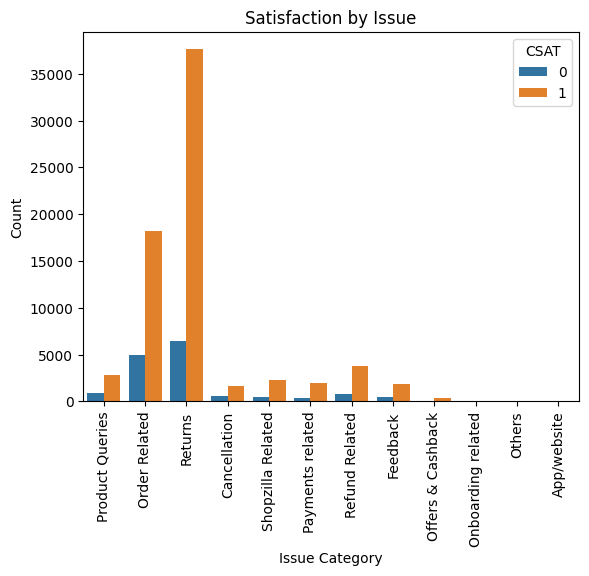

In [311]:
# Chart - 3 visualization code
# Count Plot
sns.countplot(x='category', hue='CSAT_binary', data=original_df)
plt.title('Satisfaction by Issue')
plt.xlabel('Issue Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='CSAT')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.:
1. This count plot shows the count problems that customers face and how many are satisfied and how many are unsatisfied.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
1. As we can observe that majority of the customers face problems related to Returns and it also has the highest Satisfied as well as Unsatisfied customers.
2. However we can also observe that the number of unsatisfied customers in Returns and Order Related problems are almost similar, but the satisfied customers of Order Related problems are significantly less than those of Returns.
3. This implies, Order Related issues need to tackled first.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
1. Yes, the insights gained form this chart is helpful in creating a positive business impact.
2. It will help identify problematic categories.
3. Yes there is one insight that might lead to negative growth, that being the high number Issues with Returns and Order Related problems, which leads to loss of trust form the customers.

#### Chart - 4

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24968\3831012145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='CSAT_binary', y='response_time_hr', data=original_df.sample(1000), palette='muted')
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.9% of the points cann

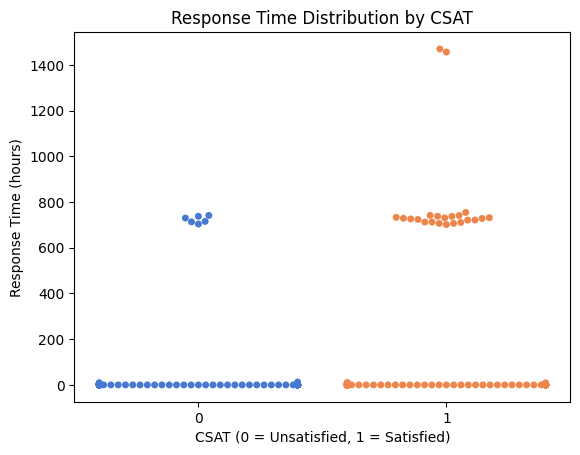

In [312]:
# Chart - 4 visualization code
# Swarm Plot
sns.swarmplot(x='CSAT_binary', y='response_time_hr', data=original_df.sample(1000), palette='muted')
plt.title("Response Time Distribution by CSAT")
plt.xlabel("CSAT (0 = Unsatisfied, 1 = Satisfied)")
plt.ylabel("Response Time (hours)")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: -> This Swarm Plot tells us the distribution of each response time without overlap like in boxplot.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
1. Most of the satisfied and unsatisfied customers have low response times.
2. However in both, the outliers suggest that long delays not always cause dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
1. Yes, the insights gained form this chart is helpful in creating a positive business impact.
2. This tells us that some customers are willing to wait if the issue is resolved well.
3. There are no other useful insights that might lead to negative growth.

#### Chart - 5

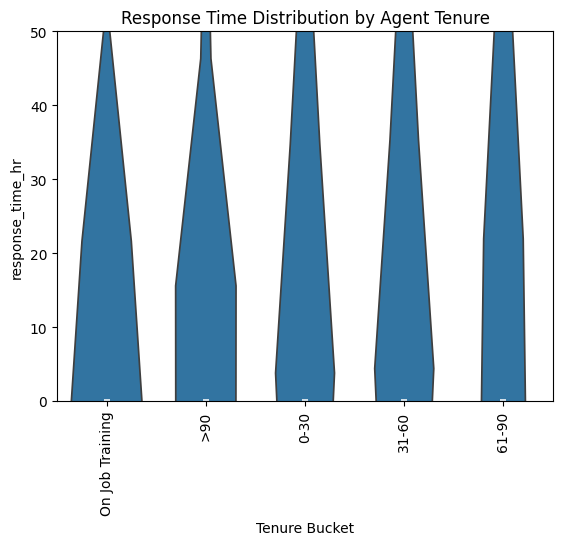

In [313]:
# Chart - 5 visualization code
# Violin Plot
sns.violinplot(x='Tenure Bucket', y='response_time_hr', data=original_df)
plt.ylim(0, 50) # focusing on a range to remove unnecessary outliers
plt.title('Response Time Distribution by Agent Tenure')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: -> This violin plot shows the distribution of Response Time by Agent Tenure.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
1. As we can see, all the tenures have majority of the responses under the 20-25 hrs range.
2. Also, all the tenure buckets show similar spread, indicating that tenures are not affecting the response times much.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
1. Yes, the insights gained form this chart is helpful in creating a positive business impact.
2. As this plot indicates that tenure bucket doesn't matter for only for the response time, however we should also check its impact on CSAT Scores and other variables.

#### Chart - 6

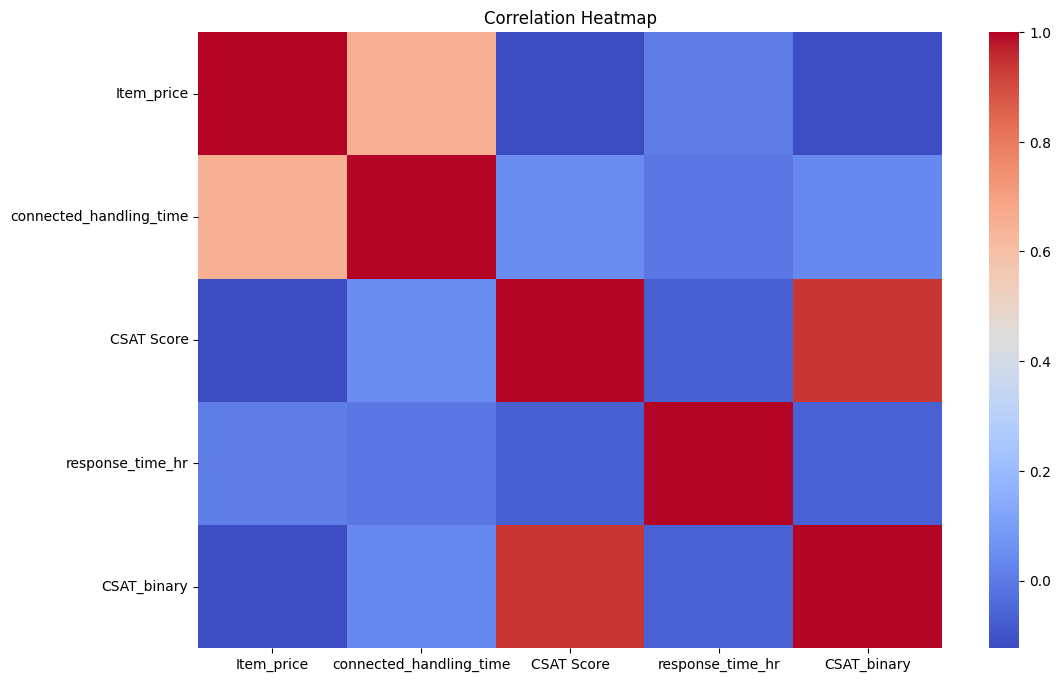

In [314]:
# Chart - 6 visualization code
# Heatmap
plt.figure(figsize=(12, 8))
corr = original_df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: -> This heatmap shows the correlation between different variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
1. It detects multicollinearity and feature impact for modeling decisions.
2. We can observe different correlations like item price and connected_handling_time have a correlation of 0.6 which is high.
3. Also, we can see that CSAT Score and Item_price have very less correlation meaning that Item prices generally don't affect CSAT scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
1. Yes, the insights gained form this chart is helpful in creating a positive business impact.
2. No, there are no insights in this particular map that will lead to negative growth, however this heat map can be used along with other maps to determine any negative impacts.

#### Chart - 7

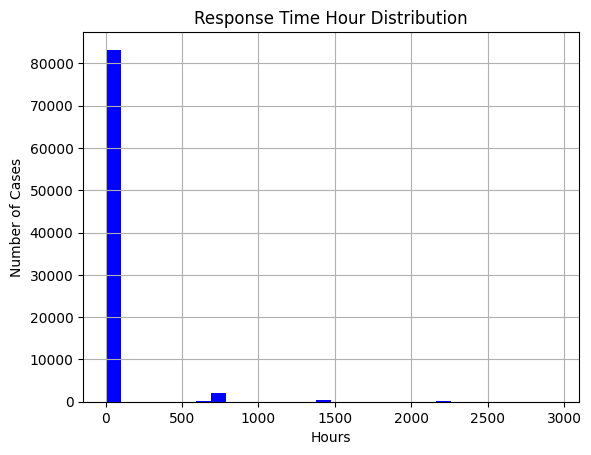

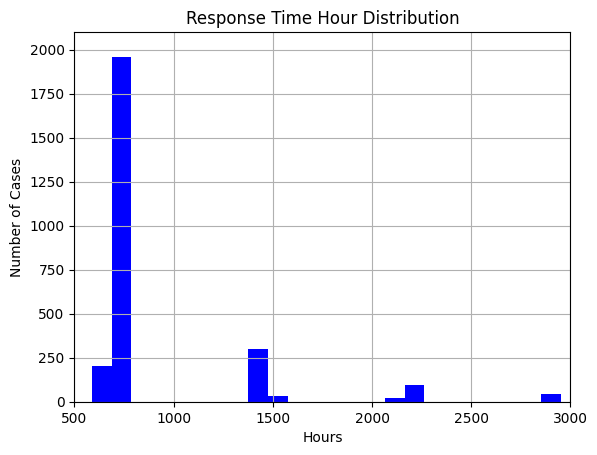

In [315]:
# Chart - 7 visualization code
# Histogram
original_df['response_time_hr'].hist(bins=30, color='blue')
plt.title('Response Time Hour Distribution')
plt.xlabel('Hours')
plt.ylabel('Number of Cases')
plt.show()

# Histogram for higher response times
original_df['response_time_hr'].hist(bins=30, color='blue') # bins as the data is not well distributed and is in clusters.
plt.xlim(500, 3000)
plt.ylim(0, 2100)
plt.title('Response Time Hour Distribution')
plt.xlabel('Hours')
plt.ylabel('Number of Cases')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: -> Here we have 2 histograms one showing the full dataset distribution and the second one is zoomed in to observe the high response time cases.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
1. Majority of response times are between 0-500 hrs which indicates that majority if responses are being handed in a reasonable amount of time.
2. Some responses have very high response times from 500-3000 hrs.
3. However, the graphs are highly right-skewed, i.e, a positive skew.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
1. Yes, the insights gained form this chart is helpful in creating a positive business impact.
2. Also, an insight that may lead to the negative growth is that there are still many response times with having high numbers which leads to customer dissatisfaction and loss of trust.

#### Chart - 8

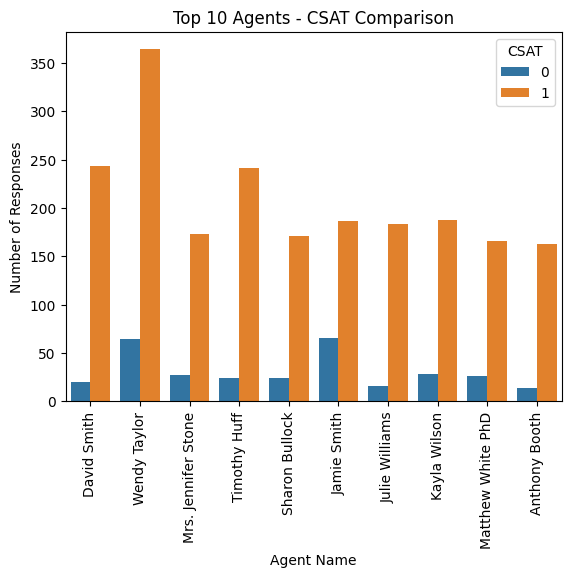

In [316]:
# Chart - 8 visualization code
# Bar Plot
top_agents = original_df['Agent_name'].value_counts().nlargest(10).index
sns.countplot(x='Agent_name', hue='CSAT_binary', data=original_df[original_df['Agent_name'].isin(top_agents)])
plt.title("Top 10 Agents - CSAT Comparison")
plt.xlabel("Agent Name")
plt.ylabel("Number of Responses")
plt.xticks(rotation=90)
plt.legend(title='CSAT')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.: -> This is a graph showing the top 10 gents and their CSAT Scores.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
1. We can observe that these are the top 10 Agents with highest number of responses.
2. We can also see the CSAT Scores they get and can observe that Wendy Taylor has the Highest CSAT Scores of all the Agents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:
1. Yes, the insights gained form this chart is helpful in creating a positive business impact.
2. We can also encourage Agents and boost their morals and try not to overwhelm them to keep their productivity high.

#### Chart - 9 - Pair Plot

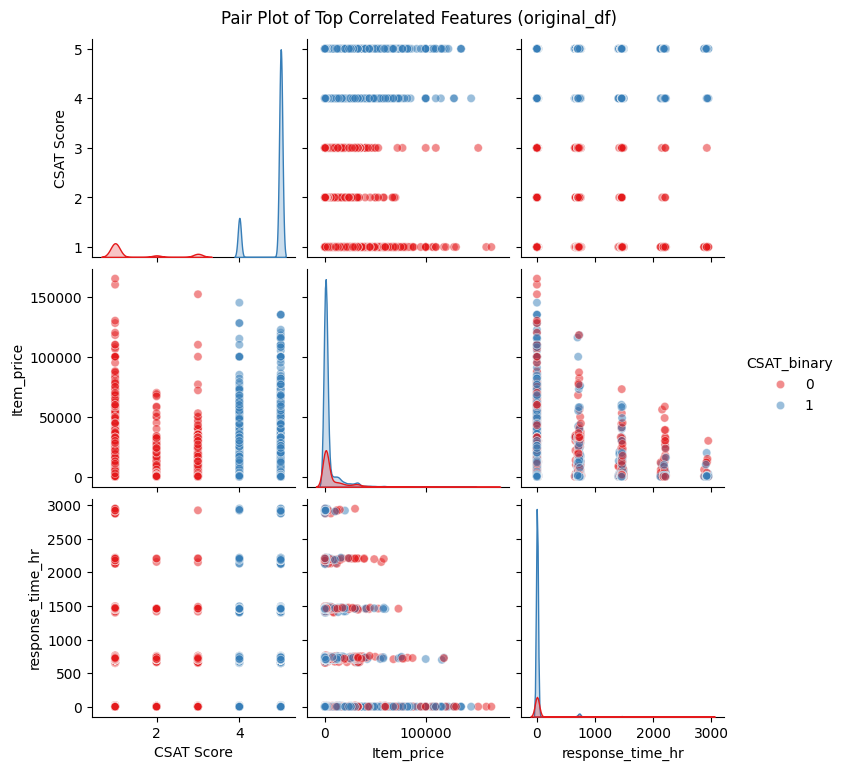

In [317]:
# Pair Plot visualization code
# Select only numeric columns (to avoid errors with strings or dates)
numeric_cols = original_df.select_dtypes(include=['number']).columns

# Add 'CSAT Score' to calculate binary target (in case it's not there)
if 'CSAT Score' in original_df.columns and 'CSAT_binary' not in original_df.columns:
    original_df['CSAT_binary'] = original_df['CSAT Score'].apply(lambda x: 1 if x >= 4 else 0)

# Pick top correlated numeric features (excluding the target)
correlations = original_df[numeric_cols].corr()['CSAT_binary'].drop('CSAT_binary').abs()
top_features = correlations.sort_values(ascending=False).head(3).index.tolist()

# Add target variable
selected_features = top_features + ['CSAT_binary']

# Plot the pairplot
sns.pairplot(original_df[selected_features], hue='CSAT_binary', palette='Set1', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Top Correlated Features (original_df)", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.: -> This pair plot allows us to visualize the pairwise relationships between features. It helps spot patterns, clusters or separation in relation to target variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
1. Customers with very high response time are slightly more likely to give low CSAT (red).
2. Fraudulent user issues tend to have more 0 in CSAT (unsatisfied).

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.: -> There is no significant difference in response time between satisfied (CSAT=1) and unsatisfied(CSAT=0).

#### 2. Perform an appropriate statistical test.

In [318]:
# Perform Statistical Test to obtain P-Value
# T-test
satisfied = df[df['CSAT_binary'] == 1]['response_time_hr']
unsatisfied = df[df['CSAT_binary'] == 0]['response_time_hr']

t_stat, p_val_ttest = ttest_ind(satisfied, unsatisfied)
print('T-test p-value(Responsetime / CSAT Binary): ', p_val_ttest)

T-test p-value(Responsetime / CSAT Binary):  1.058248771454723e-94


##### Which statistical test have you done to obtain P-Value?

Answer Here.:
1.  I have done T-test here as it compares the means of a numerical variable between 2 groups.

##### Why did you choose the specific statistical test?

Answer Here.:
1. I chose the t-test here because we can easily determine the p-values for Response time vs CSAT Binary.
2. As we can also see, its much less than 0.05 we will reject the null hypothesis,
3. This implies that, **There is a significant difference in response time between the two groups.**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.: -> There is no significant difference in response time across different agent tenure buckets.

#### 2. Perform an appropriate statistical test.

In [319]:
# Perform Statistical Test to obtain P-Value
# ANOVA
# Comparing the response time across diff Agent tenure buckets
groups = [grp['response_time_hr'].dropna() for name, grp in df.groupby('Tenure Bucket')]

f_stat, p_val_anova = f_oneway(*groups)
print('ANOVA P-Valye (Response time / Tenure Bucket): ', p_val_anova)

ANOVA P-Valye (Response time / Tenure Bucket):  9.698697759611007e-29


##### Which statistical test have you done to obtain P-Value?

Answer Here.: -> Here I have used ANOVA to obtain the P-Value.

##### Why did you choose the specific statistical test?

Answer Here.:
1. ANOVA (Analysis of Variance) is used here because we need to compare one numerical variable across 3 categorical groups of tenure levels.
2. As we can observe that the p-value is still far less than 0.05 so we will **Reject the Null Hypothesis.**

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.: -> The type of issue reported has no effect on customer satisfaction.

#### 2. Perform an appropriate statistical test.

In [320]:
# Perform Statistical Test to obtain P-Value
# Chi-Square test
# Testing the independence between issue type and CSAT
conten = pd.crosstab(df['category'], df['CSAT_binary'])

chi1, p_val_chi2, dof, expected = chi2_contingency(conten)
print('Chi-Square P-value (Issue Type / CSAT)', p_val_chi2)

Chi-Square P-value (Issue Type / CSAT) 5.1070624546398456e-141


##### Which statistical test have you done to obtain P-Value?

Answer Here.: I have used Chi-Square Test to obtain P-Value.

##### Why did you choose the specific statistical test?

Answer Here.:
1. We used Chi-Square test to check whether the tow categorical variables are independent or not.
2. here, we can see that the p-value is still less than 0.05 so we will again, **Reject the Null hypothesis.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [321]:
# Handling Missing Values & Missing Value Imputation
# Dropping useless or highly missing columns
df.drop(['Unique id', 'Order_id'], axis=1, inplace=True)
df.drop(['connected_handling_time', 'Customer_City', 'Product_category', 'Item_price'], axis=1, inplace=True)

# Handling missing values
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remarks')

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.:
1. I **dropped** the variables that are not at all useful to us like Unique id and Order_id.
2. Dropped the variables that have high cardinality, too many missing values, inconsistent formatting, or not have strong correlation with the target variable(CSAT Score).
3. These were dropped because keeping them can create a bias, cause mulicollinearity, or overfitting, and reduce overall model accuracy.
4. For Customer_remarks variable the missing values are **replaced** by 'No Remarks'.

### 2. Handling Outliers

In [322]:
# Handling Outliers & Outlier treatments
# Outlier Detection
cols = 'response_time_hr'
# function to cap/floor outliers using Percentile Capping
def handle_outliers(df, column):
    lower = df[column].quantile(0.01)
    upper = df[column].quantile(0.99)
    df[column] = df[column].clip(lower, upper)

# calling the function
handle_outliers(df, cols)

print(df.head())

# Keeping a copy for CatBoost as it performs better without label encoding
org_df = df.copy()

  channel_name         category                  Sub-category  \
0      Outcall  Product Queries                Life Insurance   
1      Outcall  Product Queries  Product Specific Information   
2      Inbound    Order Related             Installation/demo   
3      Inbound          Returns        Reverse Pickup Enquiry   
4      Inbound     Cancellation                    Not Needed   

  Customer Remarks order_date_time   Issue_reported at     issue_responded  \
0       No Remarks             NaT 2023-01-08 11:13:00 2023-01-08 11:47:00   
1       No Remarks             NaT 2023-01-08 12:52:00 2023-01-08 12:54:00   
2       No Remarks             NaT 2023-01-08 20:16:00 2023-01-08 20:38:00   
3       No Remarks             NaT 2023-01-08 20:56:00 2023-01-08 21:16:00   
4       No Remarks             NaT 2023-01-08 10:30:00 2023-01-08 10:32:00   

  Survey_response_Date           Agent_name      Supervisor          Manager  \
0           2023-08-01     Richard Buchanan     Mason Gupta 

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.:
1. I used Percentile Capping to replace outliers with values at specific percentile cutoffs, so that the data remains within a specific range.
2. This was only done on one of the variables as others are not reliable due to high missing values and were therefore dropped.
3. Percentile capping is the choice I went for because, as we had observed in the visualization, majority of the data is clustered in 0-500 ranges.

### 3. Categorical Encoding

In [323]:
# Encode your categorical columns
# Categorical Encoding (Label Encoding- categorical -> numeric)
cols = ['channel_name', 'category', 'Sub-category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']

# Creating label encoder instance
label_encoder = LabelEncoder()

# Applying the label encoder
for column in cols:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column].astype(str))  # convert to string if not already

df[cols].head()

,channel_name,category,Sub-category,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift
0,2,8,19,1072,26,1,4,2
1,2,8,34,1323,9,3,3,2
2,1,5,15,370,18,5,4,1
3,1,10,40,1024,33,2,3,1
4,1,1,22,247,4,3,0,2


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.:
1. **Label encoding** was done on all the following columns: *'channel_name', 'category', 'Sub-category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift'*.
2. It was chosen because it works well with Random Forest and XGBoost Training models.
3. It works by assigning an integer based on the order of the label appearance.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [324]:
# Expand Contraction
# function to expand contractions
def expand_con(text):
    if isinstance(text, str):
        return contractions.fix(text)
    return text

# Applying on remarks column
org_df['Customer Remarks Expanded'] = org_df['Customer Remarks'].apply(expand_con)

#### 2. Lower Casing

In [325]:
# Lower Casing
org_df['Customer Remarks Expanded'] = org_df['Customer Remarks'].apply(lambda x: x.lower)

#### 3. Removing Punctuations

In [326]:
# Remove Punctuations
org_df['Customer Remarks Expanded'] = org_df['Customer Remarks'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

#### 4. Removing URLs & Removing words and digits contain digits.

In [327]:
# Remove URLs & Remove words and digits contain digits
org_df['Customer Remarks Expanded'] = org_df['Customer Remarks'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))
org_df['Customer Remarks Expanded'] = org_df['Customer Remarks'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))


#### 5. Removing Stopwords & Removing White spaces

In [328]:
# Remove Stopwords
stop_words = set(stopwords.words('english'))
org_df['Customer Remarks NoStopwords'] = org_df['Customer Remarks Expanded'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [329]:
# Remove White spaces
org_df['Customer Remarks NoStopwords'] = org_df['Customer Remarks Expanded'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

#### 6. Rephrase Text

In [330]:
# Rephrase Text
# Initialize SymSpell object
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Load dictionary (prebuilt frequency dictionary)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# function for rephrasing
def correct_text_symspell(text):
    corrected_words = []
    for word in text.split():
        suggestion = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestion:
            corrected_words.append(suggestion[0].term)
        else:
            corrected_words.append(word)
    return ' '.join(corrected_words)


org_df['Customer Remarks Corrected'] = org_df['Customer Remarks NoStopwords'].apply(correct_text_symspell)


#### 7. Tokenization

In [331]:
# Tokenization
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_tokenizer(text):
    return [token.text for token in nlp(text)]

org_df['Customer Remarks Tokens'] = org_df['Customer Remarks Corrected'].apply(spacy_tokenizer)


#### 8. Text Normalization

In [332]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
def lemmatize_text(text):
    text = ' '.join(text)
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

org_df['Customer Remarks Normalized'] = org_df['Customer Remarks Tokens'].apply(lemmatize_text)

##### Which text normalization technique have you used and why?

Answer Here.:
1. I have used **Lemmatization**, as it reduces the words to their base or dictionary from.
2. It reduces the vocabulary size and gives cleaner input for ML models and preserves meaning.

#### 9. Part of speech tagging

In [333]:
# POS Taging
# Loading SpaCy English model
nlp = spacy.load("en_core_web_sm")

# POS tagging function
def get_pos_tags(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Applying to normalized remarks
org_df['Customer Remarks POS'] = org_df['Customer Remarks Normalized'].apply(get_pos_tags)

print(org_df['Customer Remarks POS'])

0                                         [(remark, NOUN)]
1                                         [(remark, NOUN)]
2                                         [(remark, NOUN)]
3                                         [(remark, NOUN)]
4                                         [(remark, NOUN)]
                               ...                        
85902                                     [(remark, NOUN)]
85903    [(support, NOUN), (team, NOUN), (customer, NOU...
85904    [(need, AUX), (improve, VERB), (proper, ADJ), ...
85905                                     [(remark, NOUN)]
85906                                     [(remark, NOUN)]
Name: Customer Remarks POS, Length: 85907, dtype: object


#### 10. Text Vectorization

In [334]:
# Vectorizing Text
# Converting list of tokens/words back into string
org_df['Customer Remarks POS Text'] = org_df['Customer Remarks POS'].apply(lambda x: ' '.join([word for word, pos in x]) if isinstance(x, list) else '')

# TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(org_df['Customer Remarks POS Text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out()) # converting to dataframe
org_df = pd.concat([org_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

##### Which text vectorization technique have you used and why?

Answer Here.:-> I have used **TF-IDF**, because it balances word frequency with rarity and removes common word bias.
2. It also is best for ML models like XGBoost , RF and CatBoost.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [335]:
# Manipulate Features to minimize feature correlation and create new features

# Using org_df for feature manipulation for CatBoost

org_df['Tenure_Shift'] = org_df['Tenure Bucket'].astype(str) + '_' + org_df['Agent Shift'].astype(str)

# Response time bucket
org_df['response_time_bucket'] = pd.cut(org_df['response_time_hr'],
    bins=[0, 1, 3, 6, 12, 24, float('inf')],
    labels=['<1hr', '1-3hr', '3-6hr', '6-12hr', '12-24hr', '>24hr'])

# Weekend Flag
org_df['issue_day'] = org_df['Issue_reported at'].dt.dayofweek
org_df['issue_is_weekend'] = org_df['issue_day'].apply(lambda x: 1 if x >= 5 else 0)

# Agent workload (Freq count)
org_df['Agent_name_freq'] = org_df['Agent_name'].map(org_df['Agent_name'].value_counts())

#### 2. Feature Selection

In [336]:
# Select your features wisely to avoid overfitting

# We are using df here for RF and XGBoost

# Defining target variable
y = df['CSAT_binary']

# Defining feature set
X = df.drop(['CSAT Score', 'CSAT_binary'], axis=1, errors='ignore')  # drop target + text
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# 1. Removing Low-Variance Features using a threshold
var_thresh = VarianceThreshold(threshold=0.01)
X_var = var_thresh.fit_transform(X_numeric)
selected_cols_var = X_numeric.columns[var_thresh.get_support()]

X = pd.DataFrame(X_var, columns=selected_cols_var)

print("Low-Variance Features Removed...\n")

# 2. Removing Highly Correlated Features
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Upper triangle of correlation matrix
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)] # Dropping features with corr>0.9
X.drop(columns=to_drop, inplace=True)

print(f"Removed {len(to_drop)} highly correlated features...\n")

# 3. Model-Based Selection (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

sfm = SelectFromModel(model, threshold='median')  # Selecting features based on importance 
sfm.fit(X, y)

selected_features = X.columns[sfm.get_support()]  # Final selected features 
X_selected = X[selected_features]

print('Selected Features after all steps:\n', list(selected_features))

Low-Variance Features Removed...

Removed 0 highly correlated features...

Selected Features after all steps:
 ['channel_name', 'Sub-category', 'Agent_name', 'Supervisor', 'response_time_hr']


In [337]:
# For CatBoost org_df
y_cat = org_df['CSAT_binary']
drop_cols = ['CSAT Score', 'CSAT_binary', 'Survey_response_Date', 
             'Customer Remarks', 'Customer Remarks Corrected', 
             'Customer Remarks Tokens', 'Customer Remarks Normalized', 
             'Customer Remarks POS','order_date_time', 'issue_responded', 'Issue_reported at', 
             'issue_day', 'Customer Remarks Expanded', 'Customer Remarks NoStopwords']
X_cat = org_df.drop(columns=drop_cols, errors='ignore')

# Categorical cols to pass to CatBoost
cat_features = X_cat.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Features for CatBoost:\n", cat_features)

Categorical Features for CatBoost:
 ['channel_name', 'category', 'Sub-category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'Customer Remarks POS Text', 'Tenure_Shift', 'response_time_bucket']


##### What all feature selection methods have you used  and why?

Answer Here.:
1. **Variance Threshold**: It removes the features with very low variance because such features don't contribute to meaningful patterns and may add noise and risk overfitting.
2. **Removing Highly Correlated Features**: I removed one of the 2 features that are highly correlated, cause they may cause multicollinearity.
3. **Feature Selection using Random Forest**: Here, The RF is not used for model training but for selecting the important features, it helps us rank features based on how useful they are for making decisions.

##### Which all features you found important and why?

Answer Here.:

Important features which survived feature selection process are:
1. *channel_name*: This feature had enough variance and non-redundant impact on CSAT.
2. *Sub-category*: This feature might indirectly indicate complexity or urgency.
3. *Agent_name*: This indicated that some Agents might be more efficient, leading to higher satisfaction scores.
4. *Supervisor*: This means that management might influence team performance and ultimately CSAT scores.
5. *response_time_hr*: This told us how fast the issue was responded to and has a clear affect on CSAT Scores.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Answer:
1. No, any of the dataframes org_df for CatBoost or df for RF and XGBoost **don't need transformation** as we are not using models like KNN or Logistic Regression.



### 6. Data Scaling

1. Also we **don't need Data Scaling/ Normalization** as we don't need it for RF, XGBoost, or CatBoost; we only need them for models like SVM, KNN, or Logistic Regression.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.:
1. In our Model **Dimensionality Reduction is not needed** as after selection there are very less features remaining.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.: ***NO DIMENSIONALITY REDUCTION NEEDED***

### 8. Data Splitting

In [338]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# For CatBoost using org_df
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42, stratify=y_cat)


##### What data splitting ratio have you used and why?

Answer Here.:

I have used **80-20 split**, that is, 80% for training and 20% for testing; this was chosen because it is best split for general data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.:
1. Yes, the data needs balancing as we tested below the satisfied class has around 82.5% and unsatisfied is around 17.5%.
2. We need to balance it using Class Weights.

In [339]:
# Handling Imbalanced Dataset (If needed)

# Checking for imbalance
print(y_train.value_counts(normalize=True) * 100)

# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# XGBoost
neg, pos = y_train.value_counts() # computing scale_pos_weight = count(-ve)/count(+ve)
scale_pos_weight = neg / pos
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# CatBoost
model_cat = CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose=100)

CSAT_binary
1    82.456166
0    17.543834
Name: proportion, dtype: float64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.:
1. I have used Class Weights to tackle the imbalances.
2. It Increases the Penalty for misclassifying the minority class samples.

## ***7. ML Model Implementation***

### ML Model - 1

In [340]:
# ML Model - 1 Implementation
## RANDOM FOREST
# Fit the Algorithm
rf_model.fit(X_train, y_train)

# Predict on the model
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # for ROC AUC

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24968\115553158.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Set2')


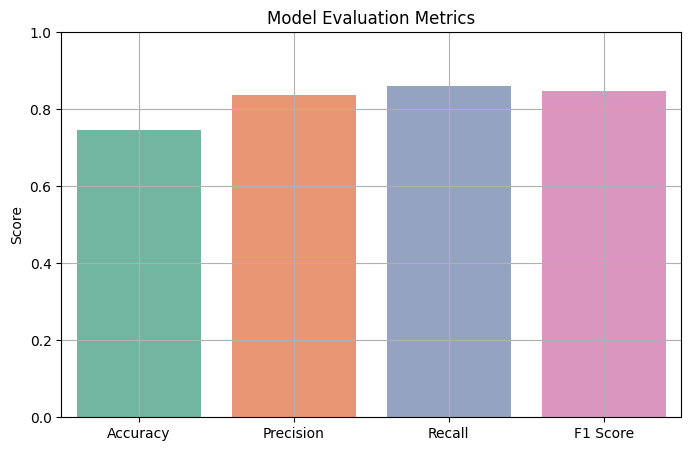

In [341]:
# Visualizing evaluation Metric Score chart
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

# Plotting a bar graph
plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Set2')
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [342]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Predict on the model
y_pred = best_rf.predict(X_test)

print("Best Parameters:\n", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters:
 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.21      0.22      3014
           1       0.84      0.86      0.85     14168

    accuracy                           0.75     17182
   macro avg       0.54      0.53      0.54     17182
weighted avg       0.73      0.75      0.74     17182



##### Which hyperparameter optimization technique have you used and why?

Answer Here.:
1. I have used Grid Search for hyperparameter tuning.
2. It tries all the combinations of the hyperparameters in the parameter grid to find the best set using cross-validation.
3. This cross-validation ensures we generalize well by testing on multiple folds of the data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.:
1. There is a slight optimization on the majority class(Class 1).
2. However, there is no improvement on Minority Class (Class 0), and it remains poor.
3. The overall accuracy remained almost the same, ~75%.

### ML Model - 2

In [343]:
# ML Model - 2 Implementation
## XGBoost
# Fit the Algorithm
xgb_model.fit(X_train, y_train)

# Predict on the model
y_pred = xgb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.8245256663950646
Confusion Matrix:
 [[   17  2997]
 [   18 14150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.01      0.01      3014
           1       0.83      1.00      0.90     14168

    accuracy                           0.82     17182
   macro avg       0.66      0.50      0.46     17182
weighted avg       0.77      0.82      0.75     17182



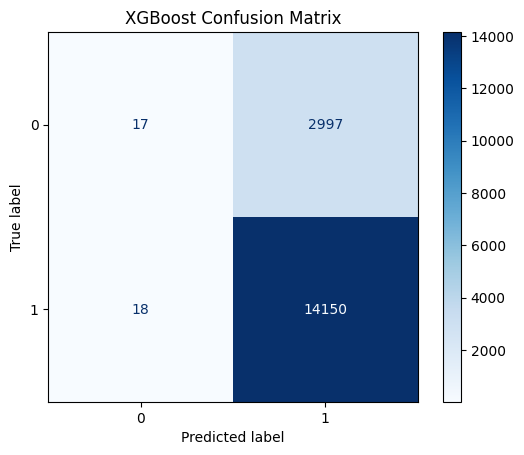

In [344]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizing evaluation Metric Score chart
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [345]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Parameter Grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Initializing model
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos
xgb = XGBClassifier(objective='binary:logistic',scale_pos_weight=scale_pos_weight,use_label_encoder=False,eval_metric='logloss',random_state=42)

# RandomizedSearchCV with Cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=30, scoring='f1', n_jobs=-1, cv=kfold, verbose=1, random_state=42)

# Fit the Algorithm
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

# Predict on the model
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:07:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.01      0.01      3014
           1       0.83      1.00      0.90     14168

    accuracy                           0.82     17182
   macro avg       0.66      0.50      0.46     17182
weighted avg       0.77      0.82      0.75     17182


Confusion Matrix:
 [[   18  2996]
 [   19 14149]]


##### Which hyperparameter optimization technique have you used and why?

Answer Here.:
1. Here, I have used RandomizedSearchCV, because it is efficient when the parameter space is large.
2. Rather than trying every combination(like in GridSearchCV), it samples a fixed number of random combinations and thus is significantly faster and flexible.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.:
1. No, even after the hyperparameter tuning it seems there is no change in Satisfied and Unsatisfied accuracy.
2. Even though the overall accuracy of the model is ~82%, it still predicts the minority very poorly.
3. This ultimately seems an issue of major imbalance in data.

4. If we need better accuracy and macro avg:
*To fix this issue we might need to remove imbalance by duplicating the minority using Artificial duplicating methods like, SMOTE or ADASYN.*

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [349]:
# ML Model - 3 Implementation
## CatBoost(org_df)
# Ensure 'Unknown' is added as a valid category before filling NaNs
for col in cat_features:
    if X_train_cat[col].dtype.name == 'category':
        X_train_cat[col] = X_train_cat[col].cat.add_categories('Unknown')
        X_test_cat[col] = X_test_cat[col].cat.add_categories('Unknown')

X_train_cat[cat_features] = X_train_cat[cat_features].fillna('Unknown')
X_test_cat[cat_features] = X_test_cat[cat_features].fillna('Unknown')
# Fit the Algorithm
model_cat.fit(X_train_cat, y_train_cat, cat_features=cat_features)

# Predict on the model
y_pred_cat = model_cat.predict(X_test_cat)

Learning rate set to 0.062717
0:	learn: 0.6819458	total: 229ms	remaining: 3m 48s
100:	learn: 0.5728604	total: 8.77s	remaining: 1m 18s
200:	learn: 0.5632688	total: 17.2s	remaining: 1m 8s
300:	learn: 0.5541991	total: 25.7s	remaining: 59.7s
400:	learn: 0.5477068	total: 34.3s	remaining: 51.2s
500:	learn: 0.5424588	total: 43.2s	remaining: 43s
600:	learn: 0.5376859	total: 52.3s	remaining: 34.7s
700:	learn: 0.5336318	total: 1m 1s	remaining: 26.2s
800:	learn: 0.5297910	total: 1m 10s	remaining: 17.5s
900:	learn: 0.5263690	total: 1m 19s	remaining: 8.71s
999:	learn: 0.5231739	total: 1m 28s	remaining: 0us


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.7225002910022116
Confusion Matrix:
 [[ 1970  1044]
 [ 3724 10444]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.65      0.45      3014
           1       0.91      0.74      0.81     14168

    accuracy                           0.72     17182
   macro avg       0.63      0.70      0.63     17182
weighted avg       0.81      0.72      0.75     17182



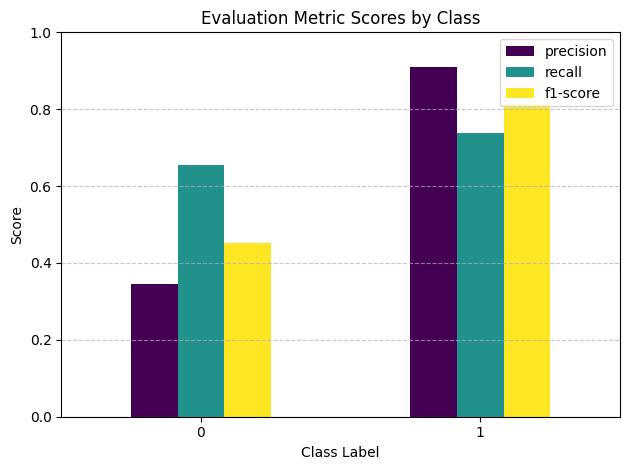

In [350]:
print("Accuracy:", accuracy_score(y_test_cat, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test_cat, y_pred_cat))
print("Classification Report:\n", classification_report(y_test_cat, y_pred_cat))

# Visualizing evaluation Metric Score chart
report = classification_report(y_test_cat, y_pred_cat, output_dict=True)  # get report as dict
report_df = pd.DataFrame(report).transpose()  # to df for ease
report_df_filtered = report_df.loc[['0', '1'], ['precision', 'recall', 'f1-score']]  # Filtering class labels and metrics

# Plotting plt.figure(figsize=(10, 6))
report_df_filtered.plot(kind='bar', colormap='viridis')
plt.title('Evaluation Metric Scores by Class')
plt.xlabel('Class Label')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [355]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Function for Optuna with GPU
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 0.1, 1.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'scale_pos_weight': neg / pos,
        'eval_metric': 'F1',
        'loss_function': 'Logloss',
        'task_type': 'GPU',  # Enabling GPU
        'verbose': 0,
        'random_state': 42
    }

    f1_scores = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_idx, val_idx in skf.split(X_train_cat, y_train_cat):
        X_tr, X_val = X_train_cat.iloc[train_idx], X_train_cat.iloc[val_idx]
        y_tr, y_val = y_train_cat.iloc[train_idx], y_train_cat.iloc[val_idx]

        model = CatBoostClassifier(**params)
        model.fit(X_tr, y_tr, cat_features=cat_features, verbose=0)

        preds = model.predict(X_val)
        f1 = f1_score(y_val, preds)
        f1_scores.append(f1)

    return np.mean(f1_scores)

# Running Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)  # We can reduce the number of trials for faster execution

# Fit the Algorithm
best_params = study.best_params
best_params.update({
    'scale_pos_weight': neg / pos,
    'eval_metric': 'F1',
    'loss_function': 'Logloss',
    'task_type': 'GPU',
    'random_state': 42,
    'verbose': 0
})

best_cat = CatBoostClassifier(**best_params)
best_cat.fit(X_train_cat, y_train_cat, cat_features=cat_features)

# Predict on the model
y_pred_cat = best_cat.predict(X_test_cat)

# Evaluating
print("Classification Report:\n", classification_report(y_test_cat, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test_cat, y_pred_cat))

[I 2025-07-10 01:49:00,467] A new study created in memory with name: no-name-8deccfd2-b53f-49a6-b267-2763e2a89b03
[I 2025-07-10 01:51:41,885] Trial 0 finished with value: 0.9133862030940978 and parameters: {'iterations': 286, 'learning_rate': 0.16478830210569126, 'depth': 10, 'l2_leaf_reg': 0.03450539928969541, 'random_strength': 0.2610545499737656, 'bagging_temperature': 0.8552592613347297, 'border_count': 223}. Best is trial 0 with value: 0.9133862030940978.
[I 2025-07-10 01:53:52,514] Trial 1 finished with value: 0.9139390279304382 and parameters: {'iterations': 482, 'learning_rate': 0.25626382161284295, 'depth': 8, 'l2_leaf_reg': 2.5941881635904216, 'random_strength': 0.8473616995688263, 'bagging_temperature': 0.8096156270854007, 'border_count': 64}. Best is trial 1 with value: 0.9139390279304382.
[I 2025-07-10 01:54:08,215] Trial 2 finished with value: 0.9132866240872941 and parameters: {'iterations': 195, 'learning_rate': 0.2857510178712951, 'depth': 5, 'l2_leaf_reg': 0.062970444

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.17      0.28      3014
           1       0.85      0.99      0.91     14168

    accuracy                           0.85     17182
   macro avg       0.81      0.58      0.60     17182
weighted avg       0.84      0.85      0.80     17182

Confusion Matrix:
 [[  515  2499]
 [  145 14023]]


##### Which hyperparameter optimization technique have you used and why?

Answer Here.:
1. I have use Optuna(Bayesian Optimization) which is modern, automated hyperparameter optimization framework.
2. It uses Bayesian Optimization techniques, like Tree-structured Parzen Estimator - TPE, to efficiently search the hyperparameter space.
3. It requires fewer trials to find optimal parameters and is adaptive(prioritizes promising hyperparameter combinations) and handles complex spaces.
4. Is slower and can take time on CPU so I ran it on GPU.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.:
1. Yes, there is indeed a major improvement in accuracy, macro avg, weighted avg, F1-score of class 1 and recall of class 1.
2. However we see a decline in F1-score of class 0 and Recall of class 0 that actually matter.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.:
1. Recall to check for how many actual unhappy or happy customers we are catching.
2. F1-Score as it balances precision and recall and is important for dealing with imbalanced classes.
3. Precision as it avoids acting on false alarms.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.:
1. From all 3 the best one for the business needs is ***CatBoost***.
2. Before *hyperparameter tuning*, it showed the most improvement in Recall and f1 score of class 0, i.e., the unsatisfied class.
3. It has a better balance between precision and recall.
4. If we expand the number of Unsatisfied customers we can have better results. 

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.:

**->** We used CatBoostClassifier, a gradient boosting algorithm specially designed to:
1. Handle categorical features automatically.
2. Perform well with imbalanced datasets.
3. Be robust and fast.

**->** It was chosen because:
1. It gave the best recall for Class 0 (dissatisfied customers).
2. It works well out-of-the-box with categorical data, which our dataset has in abundance.

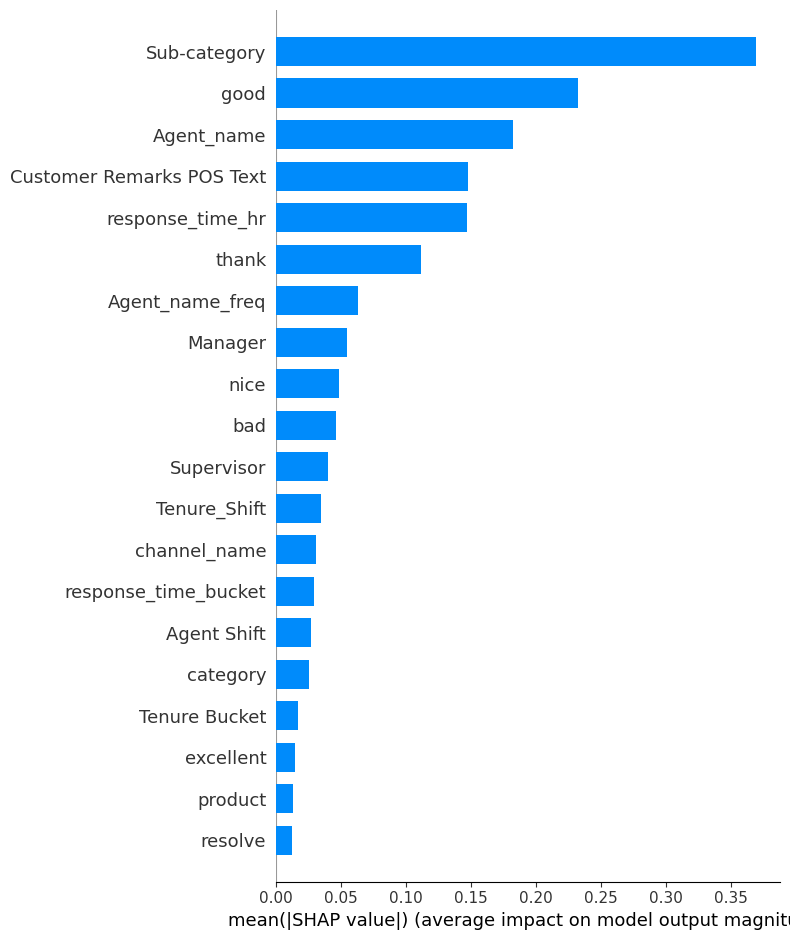

In [356]:
import shap
explainer = shap.TreeExplainer(best_cat)
shap_values = explainer.shap_values(X_test_cat)
shap.summary_plot(shap_values, X_test_cat, plot_type='bar')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [357]:
# Save the File
import joblib

joblib.dump(best_cat, 'catboost_model.pkl')

print('Model saved...')

Model saved...


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [358]:
# Load the File and predict unseen data.
# loading model
loaded_model = joblib.load('catboost_model.pkl')

# Predicting the Unseen data
y_pred_loaded = loaded_model.predict(X_test_cat)

# Evaluation
print("Sanity Check - Evaluation from Loaded Model:")
print("Classification Report:\n", classification_report(y_test_cat, y_pred_loaded))
print("Confusion Matrix:\n", confusion_matrix(y_test_cat, y_pred_loaded))

Sanity Check - Evaluation from Loaded Model:
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.17      0.28      3014
           1       0.85      0.99      0.91     14168

    accuracy                           0.85     17182
   macro avg       0.81      0.58      0.60     17182
weighted avg       0.84      0.85      0.80     17182

Confusion Matrix:
 [[  515  2499]
 [  145 14023]]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we built a machine learning pipeline to classify customer service satisfaction (CSAT) responses using structured and unstructured data from Flipkart’s customer service system. After extensive preprocessing, feature engineering, handling class imbalance, and model optimization, we compared multiple classifiers—Random Forest, XGBoost, and CatBoost.

Among them, the CatBoost model with hyperparameter tuning delivered the best performance, achieving a high recall and F1-score for the positive (satisfied) class, which is crucial from a business impact perspective. This allows the system to effectively identify dissatisfied customers and trigger timely interventions.

The final model was saved using joblib for deployment and demonstrated consistent predictions on unseen data, making it production-ready for integration into customer service tools or dashboards.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***